# Non-linear 2D classifier

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tqdm

from sklearn.utils import shuffle
# import sklearn.datasets as datasets
from sklearn.datasets import make_moons


float32
float32
(2000, 2)
(2000, 1)


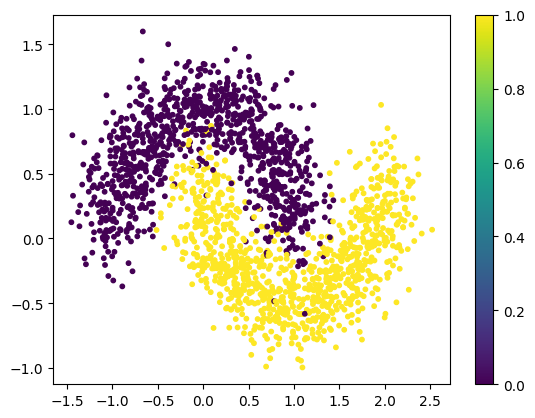

In [52]:

# Generate the dataset
X, y = make_moons(n_samples=2000, noise=0.2, random_state=42)

# # Visualize the dataset
# plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class A", s=10)
# plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class B", s=10)
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.legend()
# plt.show()


X = X.astype(np.float32)
y = y.astype(np.float32)

print(X.dtype)
print(y.dtype)

y = y.reshape((len(y),1))

print(X.shape)
print(y.shape)

X, y = shuffle(X, y, random_state=42)  # You can set a random seed for reproducibility

plt.scatter(X[:,0], X[:,1], c=y, s=10)
plt.colorbar()
plt.show()


In [53]:



tf.random.set_seed(42)

input_dim =2
output_dim = 1

W1 = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,32), minval=-0.01, maxval=0.01))
# display(W1)
b1 = tf.Variable(initial_value=tf.zeros(32))
# display(b1)

W2 = tf.Variable(initial_value=tf.random.uniform(shape=(32,16), minval=-0.01, maxval=0.01))
# display(W2)
b2 = tf.Variable(initial_value=tf.zeros(16))
# display(b2)

W3 = tf.Variable(initial_value=tf.random.uniform(shape=(16,output_dim), minval=-0.01, maxval=0.01))
# display(W3)
b3 = tf.Variable(initial_value=tf.zeros(output_dim))
# display(b3)

def model(inputs):
    # return tf.matmul(inputs,W)+b
    y1 = tf.nn.relu(tf.matmul(inputs,W1)+b1)
    y2 = tf.nn.relu(tf.matmul(y1,W2)+b2)
    # return tf.nn.relu(tf.matmul(inputs,W)+b)
    return tf.nn.sigmoid(tf.matmul(y2,W3)+b3)


In [54]:
# # Training loop
# def sq_loss(targets, predictions):
#     per_sample_loss = tf.square(targets-predictions)
#     return tf.reduce_mean(per_sample_loss)
# learning_rate = 0.001

# def training_step(inputs, targets):
#     with tf.GradientTape() as tape:
#         predictions = model(inputs)
#         loss = sq_loss(targets, predictions)
#     grad_loss_W1, grad_loss_b1, grad_loss_W2, grad_loss_b2, grad_loss_W3, grad_loss_b3  = tape.gradient(loss, [W1,b1,W2,b2,W3,b3])
#     W1.assign_sub(grad_loss_W1*learning_rate)
#     b1.assign_sub(grad_loss_b1*learning_rate)
#     W2.assign_sub(grad_loss_W2*learning_rate)
#     b2.assign_sub(grad_loss_b2*learning_rate)
#     W3.assign_sub(grad_loss_W3*learning_rate)
#     b3.assign_sub(grad_loss_b3*learning_rate)
#     return loss


# Training loop
# learning_rate = 0.001
# momentum=0.9
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)

        #loss calculation
        per_sample_loss = tf.square(targets-predictions)
        loss = tf.reduce_mean(per_sample_loss)
        # loss = sq_loss(targets, predictions)

    # obtain the gradients
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])

    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

    return loss



100%|██████████| 3000/3000 [00:34<00:00, 87.01it/s]


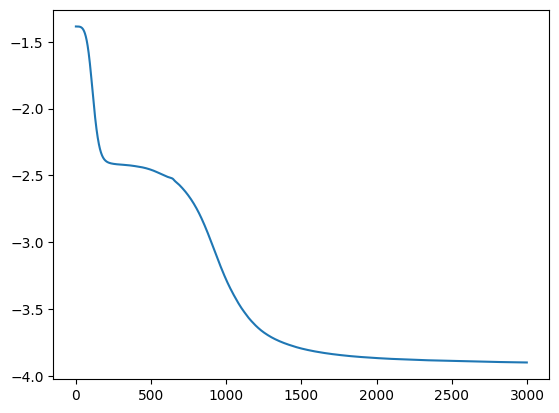

In [55]:


loss_t = []
tsteps = 3000
pbar = tqdm.tqdm(total=tsteps, desc='Training Progress')
for step in tqdm.trange(tsteps):
    loss = training_step(X, y)
    loss_t.append(loss)
    pbar.update(1)
    pbar.set_postfix({'Loss': f'{loss:.4f}', 'Accuracy': f'{1.0 - loss:.4f}'})

plt.plot(loss_t)
plt.show()


# from IPython.display import display, clear_output

# loss_t = []
# tsteps = 400

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.tick_params(axis='both', labelsize=10, color='white', labelcolor='white')

# pbar = tqdm.tqdm(total=tsteps, desc='Training Progress')
# for step in range(tsteps):
#     loss = training_step(X, y)
#     loss_t.append(loss)

#     ax.set_xlim(0, step)
#     ax.cla()
#     ax.plot(loss_t)
#     # ax.xaxis.label.set_color('white')
#     display(fig)
#     clear_output(wait = True)
#     plt.pause(1.0)




tf.Tensor(
[[9.8931050e-01]
 [9.4609487e-01]
 [3.9124548e-06]
 [9.9897218e-01]
 [3.2160106e-01]
 [9.9918658e-01]
 [1.8696465e-04]
 [1.8162316e-03]
 [9.9949670e-01]
 [9.9471021e-01]], shape=(10, 1), dtype=float32)


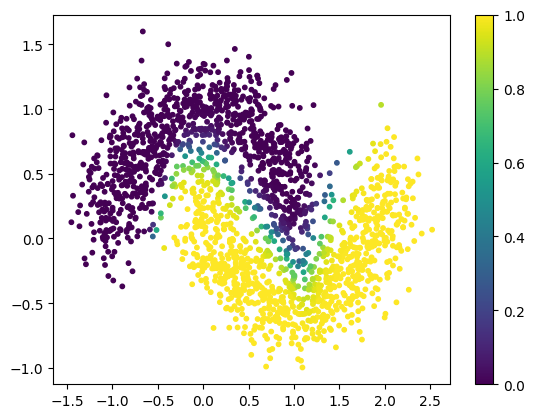

In [56]:


predictions = model(X)

print(predictions[0:10])

# input = np.linspace(-1, 2, 100)
# out = np.linspace(0, 0, 100)
# print(input)

plt.scatter(X[:, 0], X[:, 1], c=predictions[:, 0], s=10, vmin=0, vmax=1)
# plt.plot(input, out, color='red')
plt.colorbar()
plt.show()

